# Gravitational Solitons and Spatial Flatness by Feinstein and Charach
##  Geoff Cope
##  Univeristy of Utah
##  January 8, 2022

https://iopscience.iop.org/article/10.1088/0264-9381/3/1/002/meta

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [41]:
t,x,y,z,dt,dx,dy,dz,u,v = symbols('t x y z dt dx dy dz u v')

In [4]:
f = Function('f')(t,z)
f

In [5]:
p = Function('p')(t,z)
p

In [6]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dx,dy,dz] ) 
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [8]:
lineElement = expand( exp(f)*(-dt**2 + dz**2) + t*(exp(p)*dx**2 + exp(-p)*dy**2) )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  f(t, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              p(t, z)                       ⎥
⎢    0      t⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -p(t, z)          ⎥
⎢    0          0       t⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(t, z)⎥
⎣    0          0            0       ℯ       ⎦

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  f(t, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              p(t, z)                       ⎥
⎢    0      t⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -p(t, z)          ⎥
⎢    0          0       t⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(t, z)⎥
⎣    0          0            0       ℯ       ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  f(t, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              p(t, z)                       ⎥
⎢    0      t⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -p(t, z)          ⎥
⎢    0          0       t⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(t, z)⎥
⎣    0          0            0       ℯ       ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                                                                                                ∂          ⎤                          
⎢⎢──(f(t, z))                                                                                      ──(f(t, z))⎥                          
⎢⎢∂t                                                                                               ∂z         ⎥  ⎡                     ∂ 
⎢⎢───────────                     0                                         0                      ───────────⎥  ⎢                   t⋅──
⎢⎢     2                                                                                                2     ⎥  ⎢                     ∂t
⎢⎢                                                                                                            ⎥  ⎢        0          ────
⎢⎢             ⎛  ∂              ⎞  -f(t, z) + p(t, z)                                                        ⎥  ⎢                       
⎢⎢             ⎜t⋅──(p(t, z)) + 1⎟

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡   ⎛    2              2                         2⎞                                                                                     
⎢ 2 ⎜   ∂              ∂             ⎛∂          ⎞ ⎟     ∂                                                                               
⎢t ⋅⎜- ───(f(t, z)) + ───(f(t, z)) - ⎜──(p(t, z))⎟ ⎟ + t⋅──(f(t, z)) + 1                                                                 
⎢   ⎜    2              2            ⎝∂t         ⎠ ⎟     ∂t                                                                              
⎢   ⎝  ∂t             ∂z                           ⎠                                                                                     
⎢───────────────────────────────────────────────────────────────────────                                   0                             
⎢                                     2                                                                                                  
⎢                                 

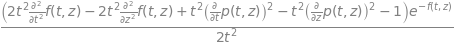

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                  ∂                                                                                     
⎢                    2                     2   0.5⋅──(f(t, z))                                                                           
⎢       ⎛∂          ⎞         ⎛∂          ⎞        ∂t            0.25                                                                    
⎢- 0.25⋅⎜──(p(t, z))⎟  - 0.25⋅⎜──(p(t, z))⎟  + ─────────────── + ────                                                                    
⎢       ⎝∂t         ⎠         ⎝∂z         ⎠           t            2                                                                     
⎢                                                                 t                                                                      
⎢                                                                                                                                        
⎢                                 

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

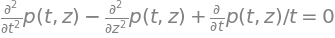

In [27]:
equation6 = Eq(expand((1/t)*Ric.tensor()[1,1].args[1]),0)
equation6

In [34]:
#  Not numbered as an equation in paper but this is a constraint equation for f
dfdz = Eq( diff(f,z) ,solve( Ric.tensor()[3,0].args[2], diff(f,z)) [0])
dfdz

In [37]:
#  Not numbered as an equation in paper but this is a constraint equation for f
Eq( diff(f,t), expand( solve( simplify(einst.tensor())[0,0], diff(f,t))[0] ) )

In [43]:
from sympy import acosh

In [46]:
#  equation2 = Eq( p , k*ln(t)- m*acosh(z/t))
#  equation2

In [45]:
X, Y = map(Function, 'XY')

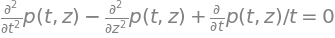

In [47]:
eq = equation6
eq

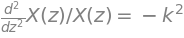

In [50]:
xODE = Eq(pde_separate( eq, p, [X(z),Y(t)])[0] , -k**2 ) 
xODE

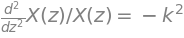

In [51]:
xODE = Eq(pde_separate( eq, p, [X(z),Y(t)])[0] , -k**2 ) 
xODE

In [52]:
from sympy import dsolve 

In [54]:
xSolution = dsolve( xODE , X(z))
xSolution 

In [56]:
#  Arbitrarily pick cos
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],0).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

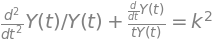

In [58]:
yODE = Eq( pde_separate( eq, p, [X(z),Y(t)])[1] ,  k**2 ) 
yODE

In [59]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [62]:
#  This is arbitrary... go back and change this
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],0)
ySolutionParticular

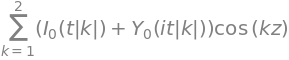

In [61]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [64]:
psiSumTwoTerms = Eq(p, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [65]:
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 